<a href="https://colab.research.google.com/github/cycywanyeki20/PHASE-3-PROJECT/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNDERSTANDING CONSUMER BEHAVIOUR ANALYSIS. A MACHINE LEARNING APPROACH FOR E-COMMERCE TRENDS.**

**Student Name: Cynthia Wanyeki**

**Technical Mentor: Nikita Njoroge, Diana Mong'ina, Lucille Kaleha.**

**Phase: Phase 3 Project**

**Deadline: 1st December 2023.**

[1. INTRODUCTION](#1.INTRODUCTION) </br>
[1.1 BUSINESS UNDERSTANDING](#1.1BUSINESS-UNDERSTANDING) </br>
[1.2 Problem Statement](#1.2Problem-Statement) </br>
[1.3 Objectives](#1.3Objectives) </br>
[1.3.1 Main Objective](#1.3.1Main-Objective) </br>
[1.3.2 Specific Objective](#1.3.2Specific-Objectives) </br>
[2. Libraries](#2.LOADING-LIBRARIES) </br>
[3. Data Understanding](#3.Data-Understanding) </br>
[4. Data preprocessing](#4.Data-preprocessing) </br>
[4.1 Data Cleaning](#4.1Data-Cleaning) </br>
[4.2 Handling Missing Values](#4.2Handling-Missing-Values) </br>
[4.3 Check Info](#4.3Check-info) </br>
[5. EXPLORATORY DATA ANALYSIS](#5.EXPLORATION-DATA-ANALYSIS) </br>
[5.1 Univariate Analysis](#5.1Univariate-Analysis) </br>
[5.2 Categorical Data](#5.2Categorical-Data)</br>
[5.3 Bivariate analysis](#5.2Bivariate-analysis) </br>
[6. Feature Engineering](#6.Feature-Engineering) </br>
[6.1 Feature Engineering for Amazon Dataset](#6.Feature-Engineering-for-Amazon-Dataset) </br>
[6.2 Feature Engineering for Shopbhvr Dataset](#6.Feature-Engineering-for-Shopbhvr-Dataset) </br>
[7. Modelling](#7.Data-Modelling) </br>
[7.1 Logistic Regression](#7.1Logistic-Regression) </br>
[7.2 Decision Tree](#7.2Decision-Tree) </br>
[7.2.1 Tree Pruning](#7.2.1Tree-Pruning) </br>
[7.3 Ensemble methods](#7.5Ensemble-methods) </br>
[7.3.1 Random Forest](#7.5.1Random-Forest) </br>
[7.3.2 XGBoost](#7.3.2XGBoost) </br>
[8. Data Evaluation](#8.Data-Evaluation) </br>
[9. Conclusion](#9.Conclusion) </br>
[10. Recommendations](#10.Recommendations) </br>

# **1.) INTRODUCTION.**

The aim of this project is to analyse consumer behaviour on E-Commerce platform and build a model that can improve engagement on these platforms in order to make more sales.

The online market is the largest platform and E-Commerce when tapped into really well is a amazing way to make more sales.

This analysis uses a real-time project dataset from Kaggle for Amazon Customer Behavior Survey and Shopping Behavior Survey.

# **1.1) BUSINESS UDERSTANDING**

The e-commerce industry has witnessed unprecedented growth in recent years, with a surge in online shopping platforms providing consumers with a plethora of choices. Understanding customer behavior on these platforms is crucial for businesses to enhance user experience, optimize marketing strategies, and ultimately boost sales. This project aims to delve into the nuances of customer behavior on e-commerce platforms, uncovering patterns and insights that can inform strategic decision-making.

# **1.2) PROBLEM STATEMENT.**


Despite the rapid growth of the e-commerce sector, businesses face challenges in comprehensively understanding customer behavior. The lack of detailed insights into user preferences, navigation patterns, and purchase decision factors hinders the ability to tailor services and offerings effectively. This project aims to address this gap by conducting a thorough analysis of customer behavior on e-commerce platforms, identifying pain points, and proposing solutions for a more personalized and seamless user experience.

# **1.3) OBJECTIVES.**


**Customer Segmentation:** Identify and classify different customer segments based on their behavior, preferences, and buying patterns.

**User Journey Analysis**: Map out the typical user journey on the e-commerce platform, highlighting key touchpoints, drop-offs, and areas of improvement.

**Product Affinity Analysis:** Understand the relationships between products, analyzing which items are often purchased together or in succession.

**Conversion Rate Optimization:** Identify factors influencing conversion rates and propose strategies to optimize the conversion funnel.

**Predictive Analytics:** Utilize predictive modeling to forecast future trends in customer behavior and anticipate potential challenges.

# **2.) LIBRARIES.**

**2.1) Importing Libraries**

In [44]:
#import libraries
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier
import xgboost as xgb

# **2.2) LOADING DATASETS**

In [45]:
#load the Amazon_Customer_Behavior_Survey dataset
df_Amazon= pd.read_csv('/content/Amazon Customer Behavior Survey.csv')
df_Amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [46]:
#Load the Shopping_behavior dataset
df_shopbhvr= pd.read_csv('/content/shopping_behavior_updated.csv')
df_shopbhvr.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# **3. DATA UNDERSTANDING**

The Amazon Customer Behavior Survey dataset contains 23 columns,602 rows,5 numerical variables and 18 non-numeric variable.

The Shopping Behavior dataset contains 18 columns,3900 rows, 5 numeric variables and 13 non-numeric variables.



**3.1) Understanding column names, Data types and Summary Statistics for the Amazon Dataset**

In [47]:
# Understanding Amazon_customer_Behavior_Survey Dataset

# Display column names
column_names = df_Amazon.columns
print("Column Names:")
print(column_names)

# Display data types
data_types = df_Amazon.dtypes
print("\nData Types:")
print(data_types)

# Display basic statistics
basic_stats = df_Amazon.describe()
print("\nBasic Statistics:")
print(basic_stats)


Column Names:
Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

Data Types:
Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                 

**3.2) Understanding column names, Data types and Summary Statistics for the shopbhvr Dataset**

In [48]:
# Understanding Shopping_Behavior Dataset

# Display column names
column_names = df_shopbhvr.columns
print("Column Names:")
print(column_names)

# Display data types
data_types = df_shopbhvr.dtypes
print("\nData Types:")
print(data_types)

# Display basic statistics
basic_stats = df_shopbhvr.describe()
print("\nBasic Statistics:")
print(basic_stats)

Column Names:
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Data Types:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object



**3.3) Check info.**

In [49]:
#Check info for Amazon dataset
print('Amazon Dataset')
df_Amazon.info()
#Check info for Shopping Behavior dataset
print('Shopping Behavior')
df_shopbhvr.info()




Amazon Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    obj

**AMAZON DATASET**

Rows=601

Columns=23

Numerical variables = 320

Categorical variables = 18


**SHOPBHVR DATASET**

Rows= 3900

Columns= 18

Numerical variables =333

Categorical variables =13

# **4. DATA PREPROCESSING**

## **4.1 DATA CLEANING**

**4.1.1) Check missing values, duplicates, outliers and data inconsistency in shopbhvr Dataset**

In [50]:
#Check missing values, duplicates, outliers and data inconsistency
#Checking in Shopping Behavior dataset

def check_data_quality(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)

    # Check for outliers (numerical columns)
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    outliers = {}
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    print("\nOutliers:")
    print(outliers)

    # Check for duplicates
    duplicates = df[df.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)

    # Check for data inconsistency; Checking unique values in a categorical column
    categorical_columns = df.select_dtypes(include='object').columns
    unique_values = {}
    for col in categorical_columns:
        unique_values[col] = df[col].unique()

    print("\nUnique Values in Categorical Columns:")
    print(unique_values)

# Example usage with a different dataset
df_AnotherDataset = pd.read_csv('/content/shopping_behavior_updated.csv')
check_data_quality(df_AnotherDataset)


Missing Values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Outliers:
{'Customer ID': 0, 'Age': 0, 'Purchase Amount (USD)': 0, 'Review Rating': 0, 'Previous Purchases': 0}

Duplicate Rows:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

Unique Values in Categorical Columns:
{'Gender':

**4.1.2) Check missing values, duplicates, outliers and data inconsistency in Amazon Dataset.**

In [51]:
#Check missing values, duplicates, outliers and data inconsistency
#Checking in Amazon dataset
def check_data_quality(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)

    # Check for outliers (numerical columns)
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    outliers = {}
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    print("\nOutliers:")
    print(outliers)

    # Check for duplicates
    duplicates = df[df.duplicated()]
    print("\nDuplicate Rows:")
    print(duplicates)

    # Check for data inconsistency; Checking unique values in a categorical column
    categorical_columns = df.select_dtypes(include='object').columns
    unique_values = {}
    for col in categorical_columns:
        unique_values[col] = df[col].unique()

    print("\nUnique Values in Categorical Columns:")
    print(unique_values)
df_AnotherDataset = pd.read_csv('/content/Amazon Customer Behavior Survey.csv')
check_data_quality(df_AnotherDataset)

Missing Values:
Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Area

**4.2) Handling missing values, duplicates, outliers and data inconsistency.**

In [52]:
#Handling missing values, duplicates, outliers and data inconsistency
def preprocess_data(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Handle missing values based on conditions
    for column, count in missing_values.items():
        if count > 0:
            if df[column].dtype == 'object':
                # For object (categorical) columns, fill with the most frequent value
                most_frequent_value = df[column].mode().iloc[0]
                df[column].fillna(most_frequent_value, inplace=True)
            elif df[column].dtype in ['int64', 'float64']:
                # For numerical columns, fill with mean
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)

    # Handle outliers based on conditions
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

    # Handle data inconsistency based on conditions
    unique_values_gender = df['Gender'].unique()
    if len(unique_values_gender) > 2:
        # If more than 2 unique values, replace with a standard value
        df['Gender'] = df['Gender'].replace(unique_values_gender[2:], 'Other')

# Example usage
preprocess_data(df_Amazon)
preprocess_data(df_shopbhvr)
# Print the updated dataset
print("Amazon Updated Dataset:")
print(df_Amazon)
# Print the updated dataset
print("Shop bhvr Updated Dataset:")
print(df_shopbhvr)



Amazon Updated Dataset:
                          Timestamp   age             Gender  \
0    2023/06/04 1:28:19 PM GMT+5:30  23.0             Female   
1    2023/06/04 2:30:44 PM GMT+5:30  23.0             Female   
2    2023/06/04 5:04:56 PM GMT+5:30  24.0  Prefer not to say   
3    2023/06/04 5:13:00 PM GMT+5:30  24.0             Female   
4    2023/06/04 5:28:06 PM GMT+5:30  22.0             Female   
..                              ...   ...                ...   
597  2023/06/12 4:02:02 PM GMT+5:30  23.0             Female   
598  2023/06/12 4:02:53 PM GMT+5:30  23.0             Female   
599  2023/06/12 4:03:59 PM GMT+5:30  23.0             Female   
600  2023/06/12 9:57:20 PM GMT+5:30  23.0             Female   
601  2023/06/16 9:16:05 AM GMT+5:30  23.0             Female   

         Purchase_Frequency  \
0         Few times a month   
1              Once a month   
2         Few times a month   
3              Once a month   
4    Less than once a month   
..                   

# **5. EXPLORATORY DATA ANALYSIS.**

Perform EDA to explore both datasets and understand their distribution, relationships and patterns.

Visualizations are essential for summary statistics in order to gain insights.

**5.1 UNIVARIATE ANALYSIS**

The purpose of a univariate analysis is to Understand the distribution and characteristics of individual variables.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bar_charts_numerical(dataset, title_prefix='', charts_per_row=2):
    numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    num_columns = len(numerical_columns)
    num_rows = (num_columns + charts_per_row - 1) // charts_per_row

    fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical_columns):
        ax = axes[i // charts_per_row, i % charts_per_row] if num_rows > 1 else axes[i % charts_per_row]
        dataset[column].plot(kind='bar', color='blue', ax=ax)
        ax.set_title(f'{title_prefix}{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')

    plt.show()



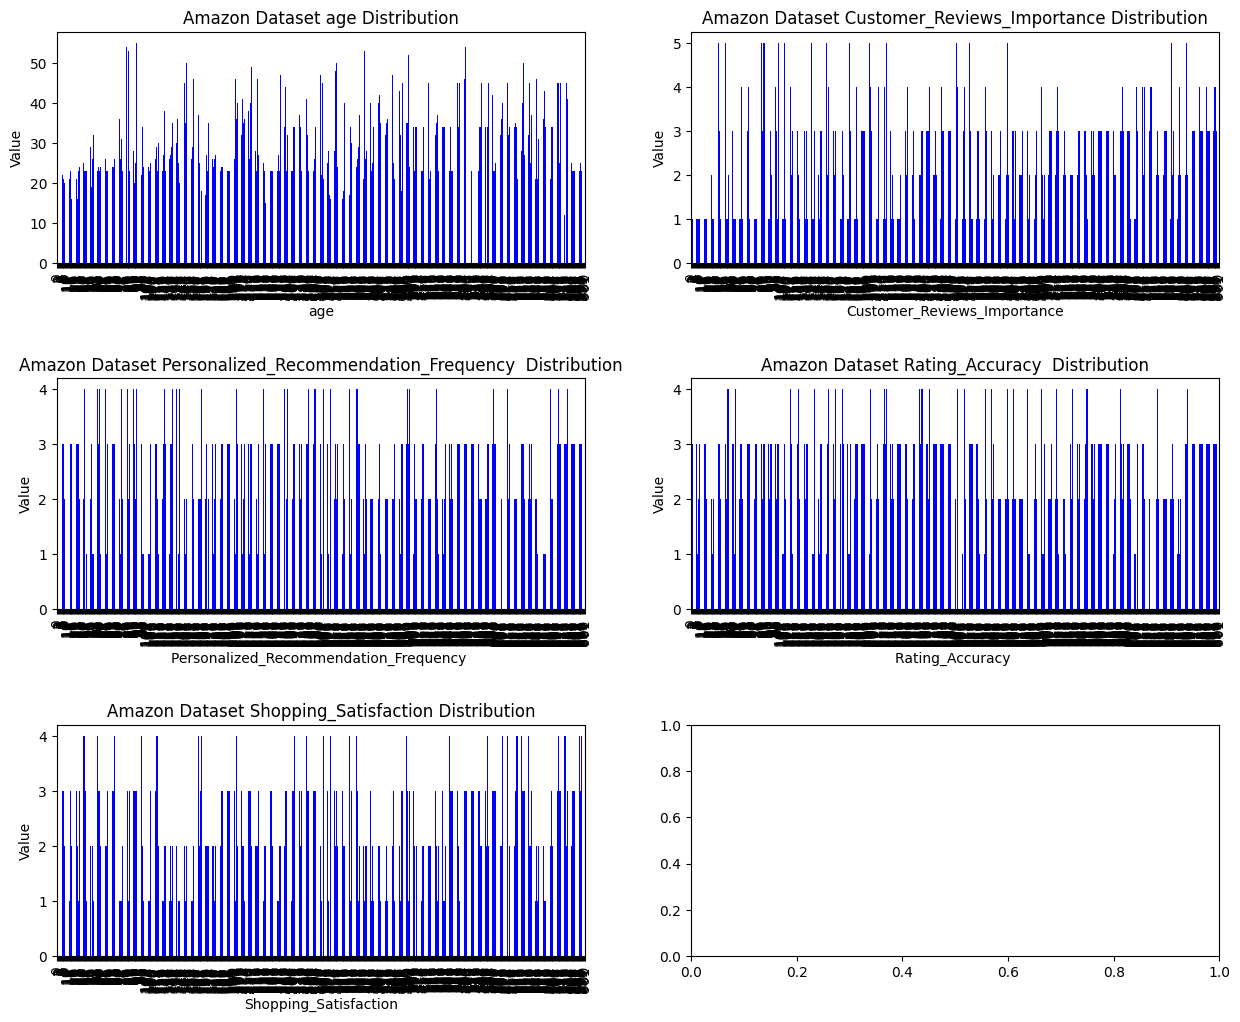

In [54]:
#Bar chart for numerical variables in Amazon dataset
plot_bar_charts_numerical(df_Amazon, title_prefix='Amazon Dataset ')


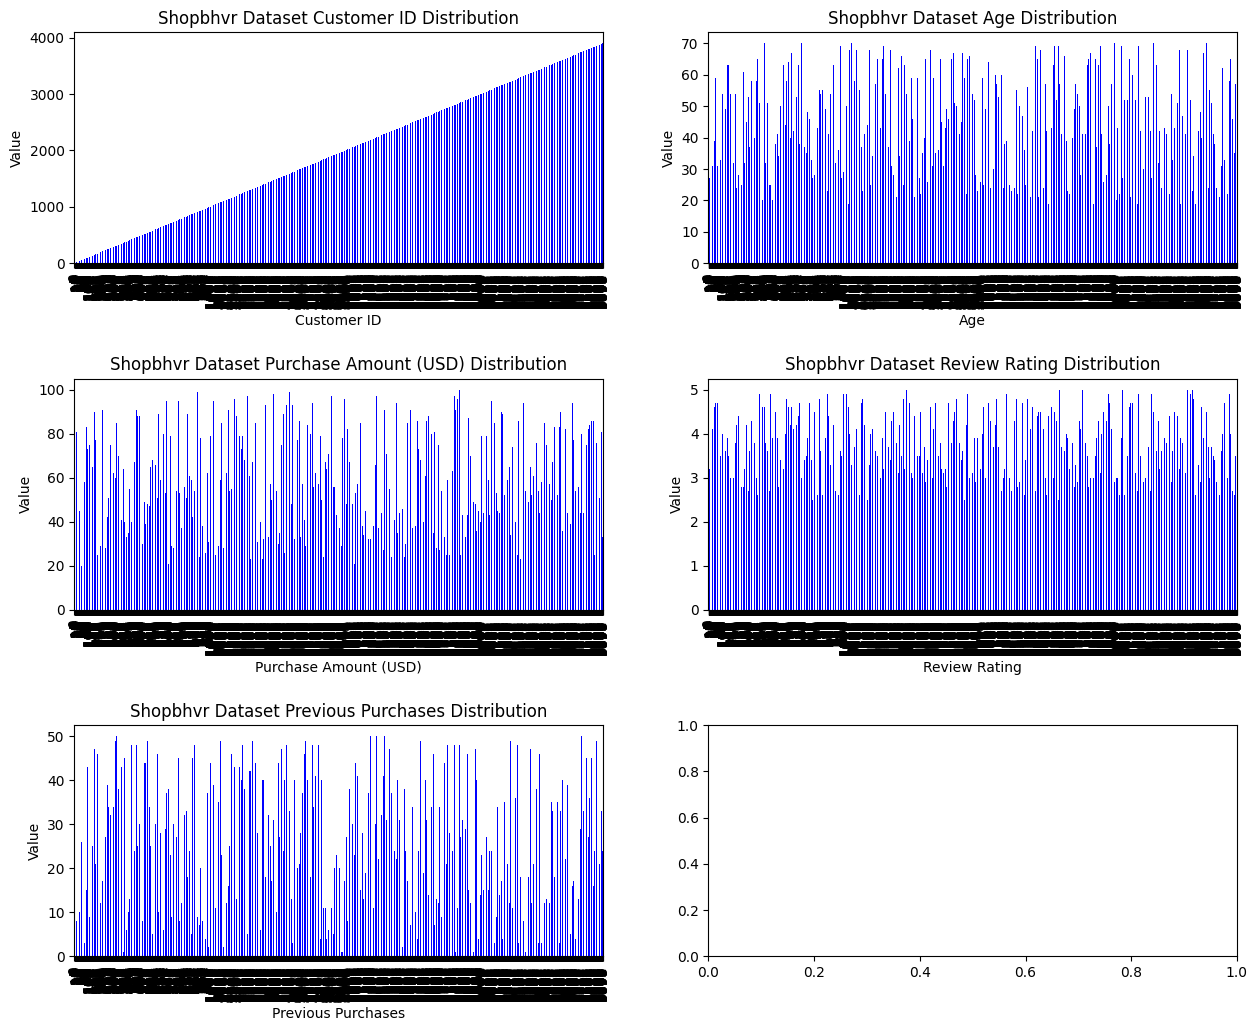

In [55]:
#Bar chart for numerical variables in shopbhvr dataset
plot_bar_charts_numerical(df_shopbhvr, title_prefix='Shopbhvr Dataset ')


**5.2) Categorical data**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bar_charts_categorical(dataset, title_prefix='', charts_per_row=2):
    categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)
    num_rows = (num_columns + charts_per_row - 1) // charts_per_row

    fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(categorical_columns):
        ax = axes[i // charts_per_row, i % charts_per_row] if num_rows > 1 else axes[i % charts_per_row]
        dataset[column].value_counts().plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f'{title_prefix}{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

    plt.show()



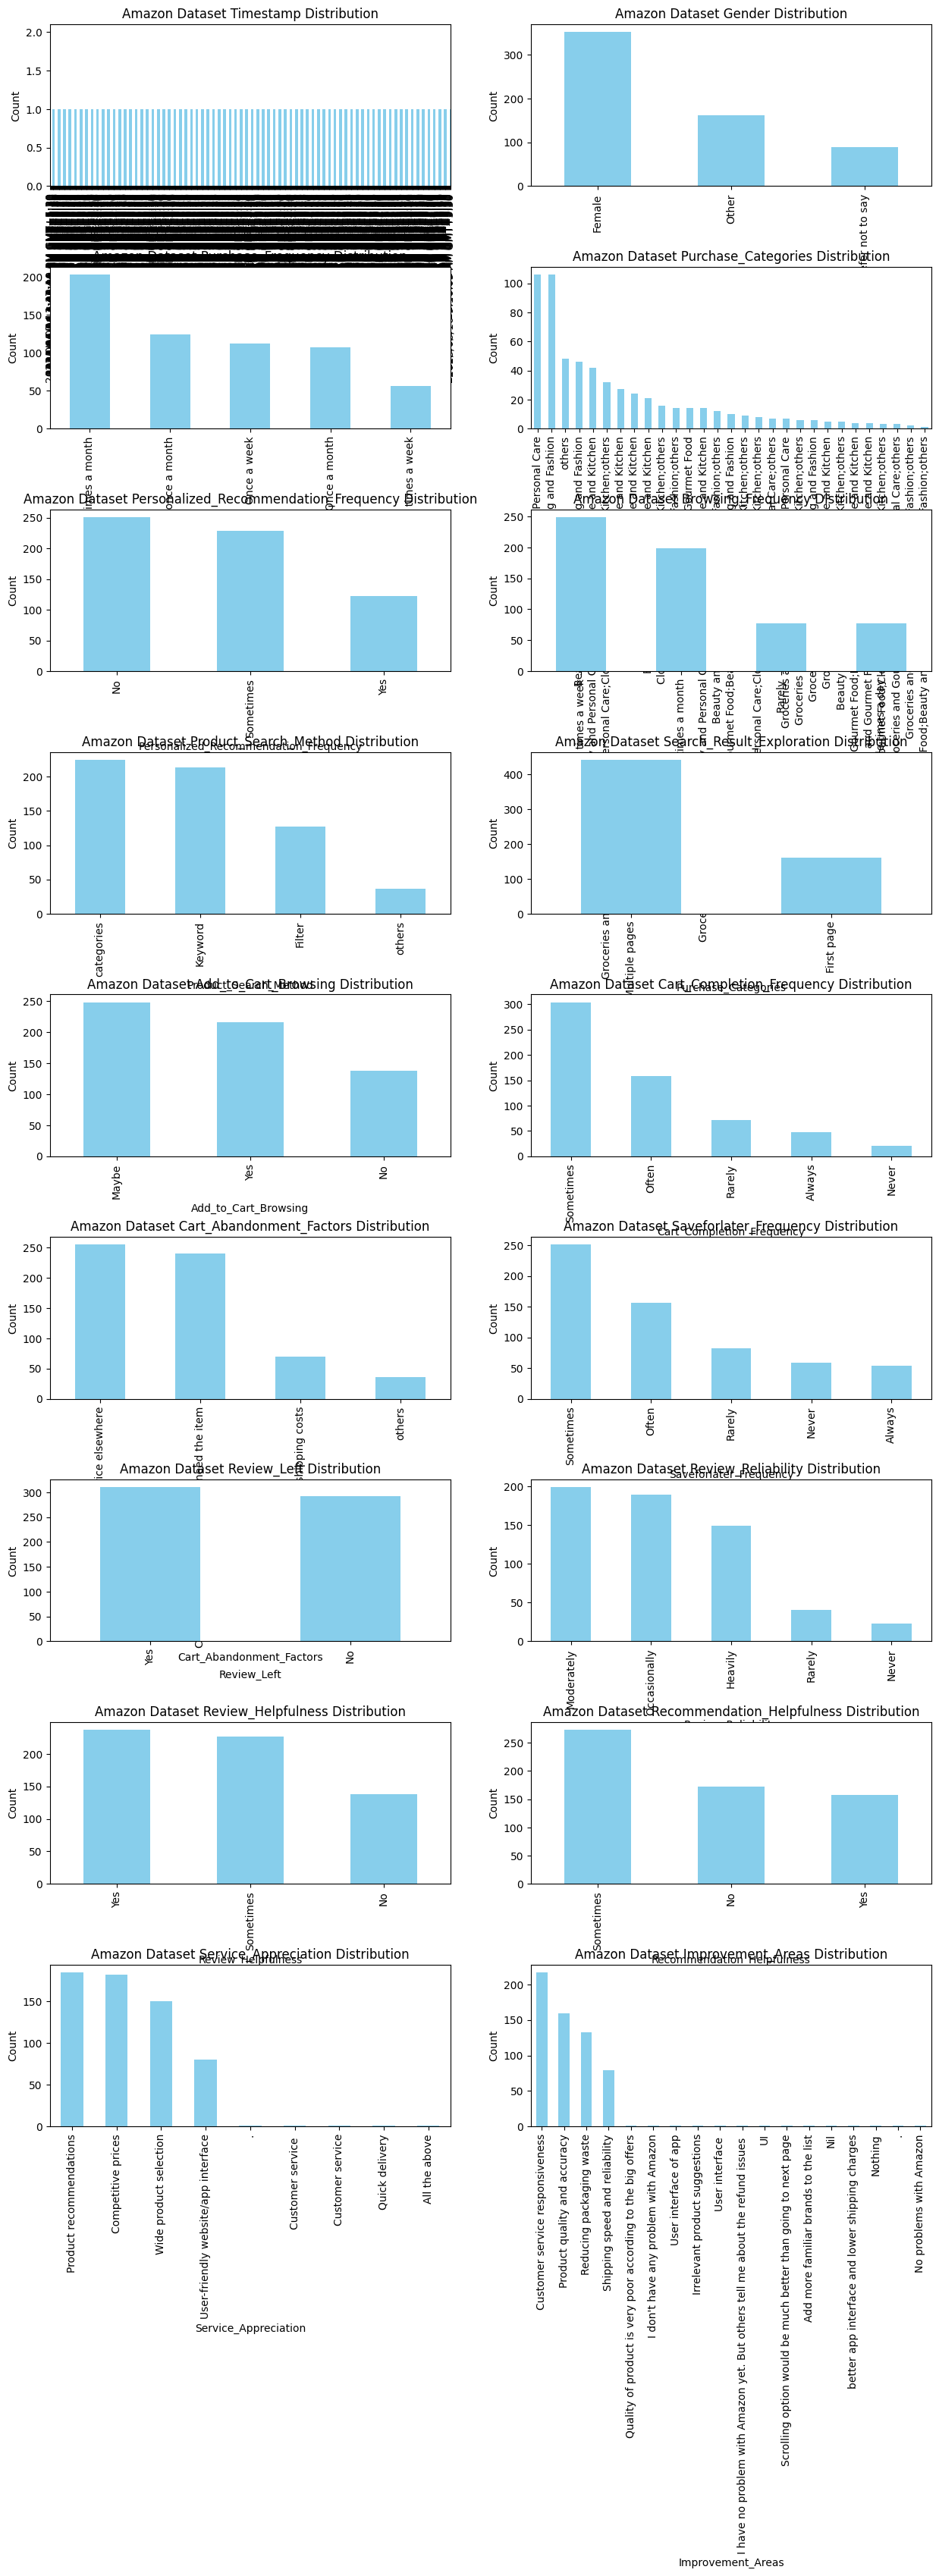

In [57]:
#Bar chart for categorical variables in Amazon dataset.
plot_bar_charts_categorical(df_Amazon, title_prefix='Amazon Dataset ')


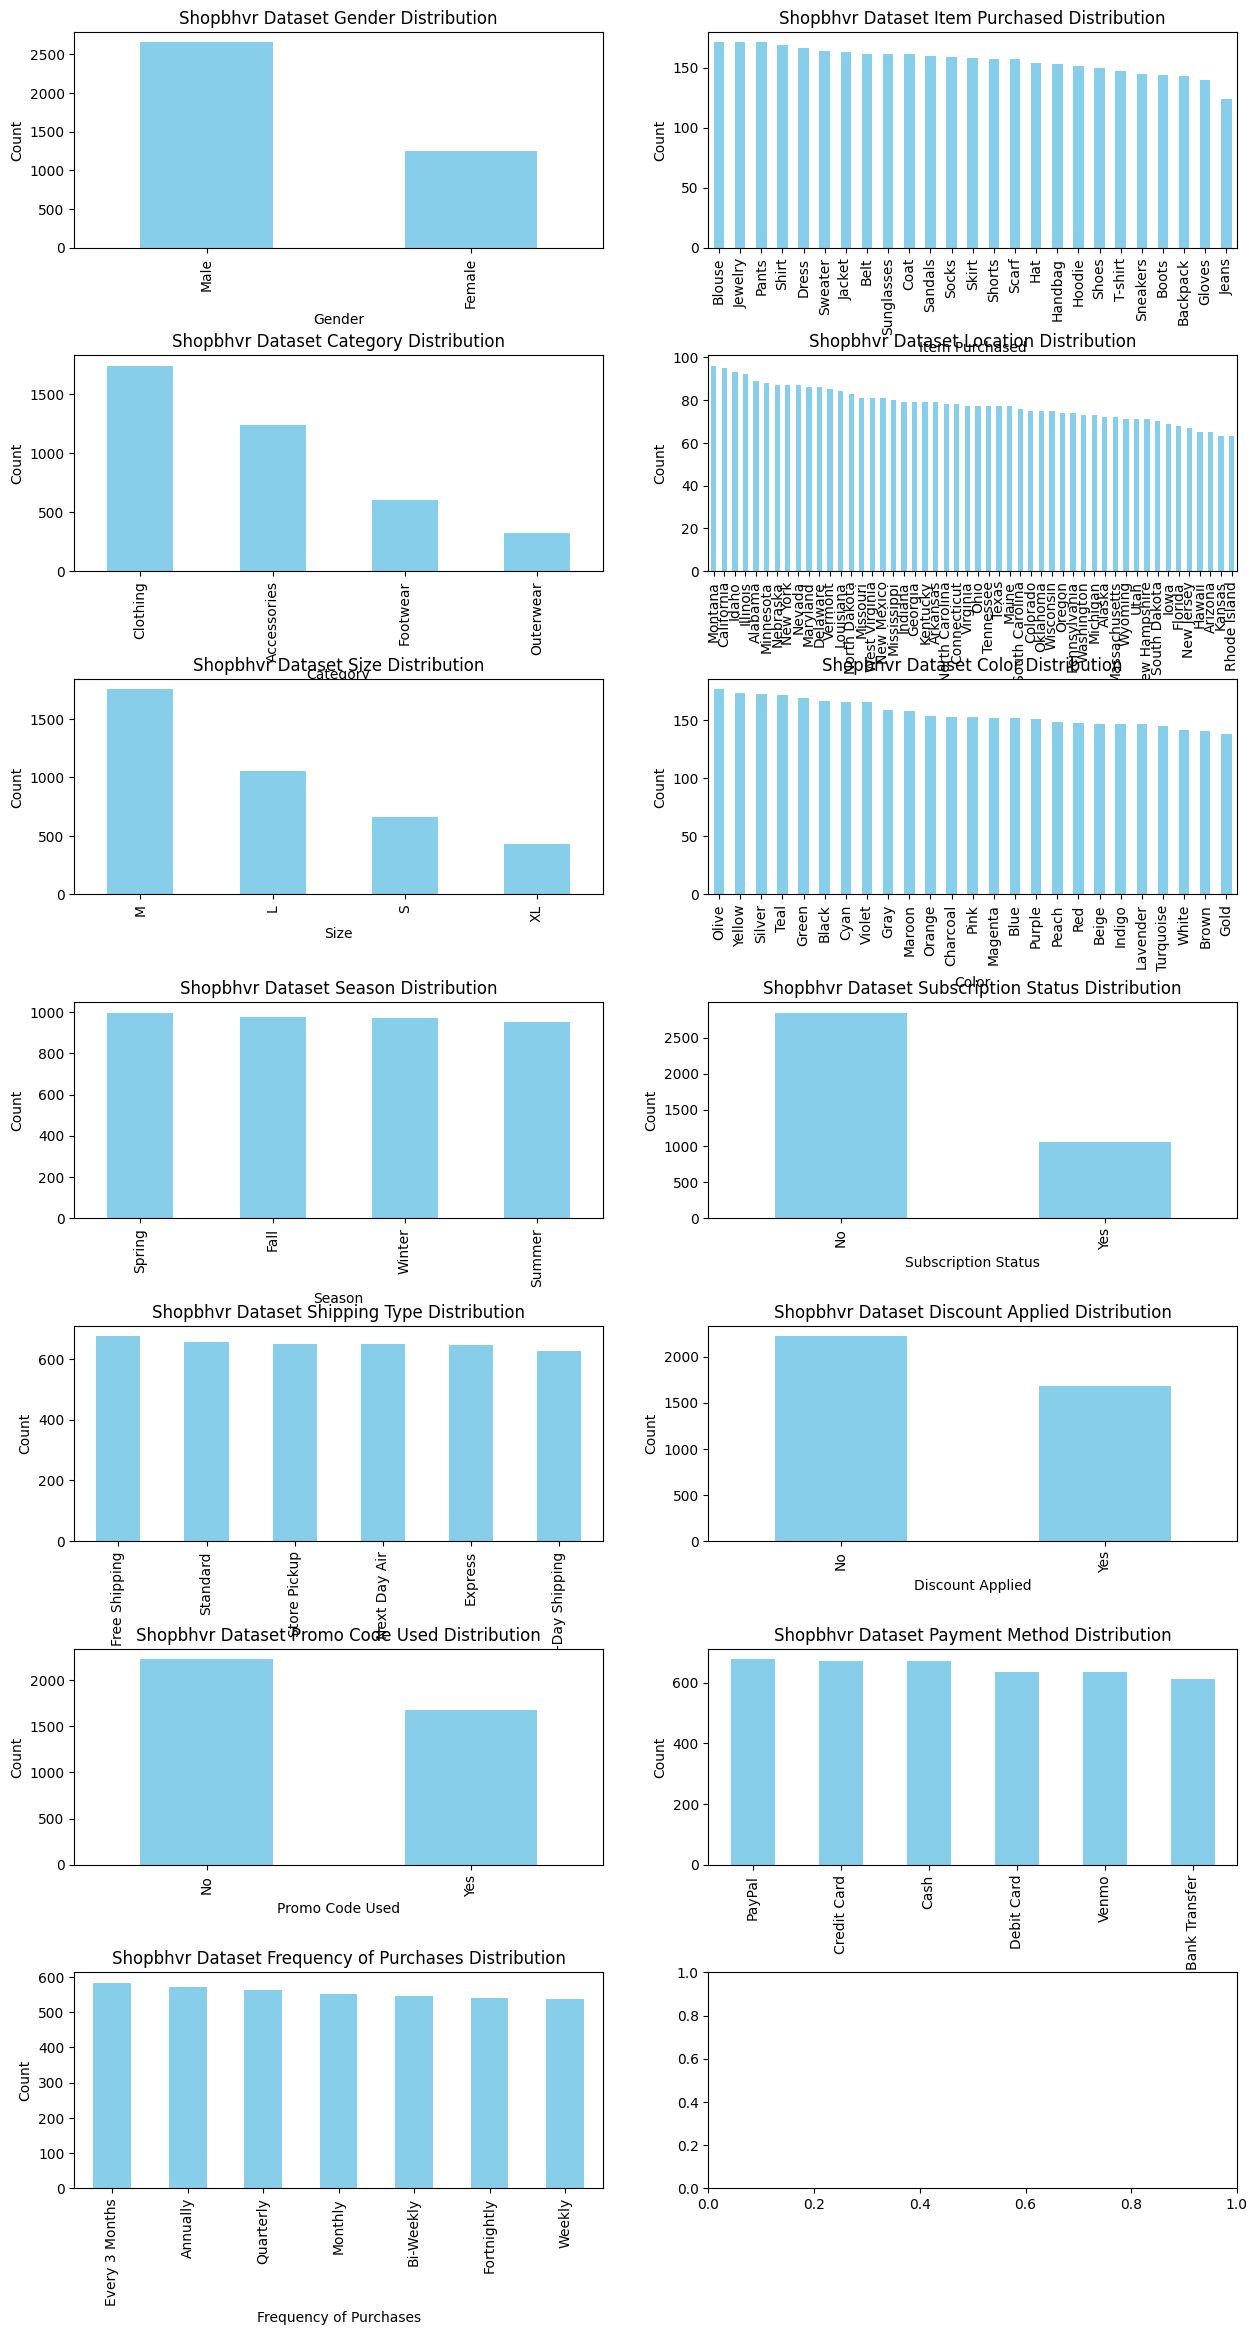

In [58]:
#Bar chart for categorical variables in the shop behavior dataset
plot_bar_charts_categorical(df_shopbhvr, title_prefix='Shopbhvr Dataset ')

**5.3) BIVARIATE** **ANALYSIS.**

The purpose of bivariate analysis is to explore the relationship and associations between pairs of variables.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_charts_numerical(dataset, title_prefix='', charts_per_row=2):
    numerical_columns = dataset.select_dtypes(include=['object', 'category']).columns
    num_columns = len(numerical_columns)
    num_rows = (num_columns + charts_per_row - 1) // charts_per_row

    fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical_columns):
        ax = axes[i // charts_per_row, i % charts_per_row] if num_rows > 1 else axes[i % charts_per_row]
        dataset[column].value_counts().plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f'{title_prefix}{column} Distribution')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

    plt.show()

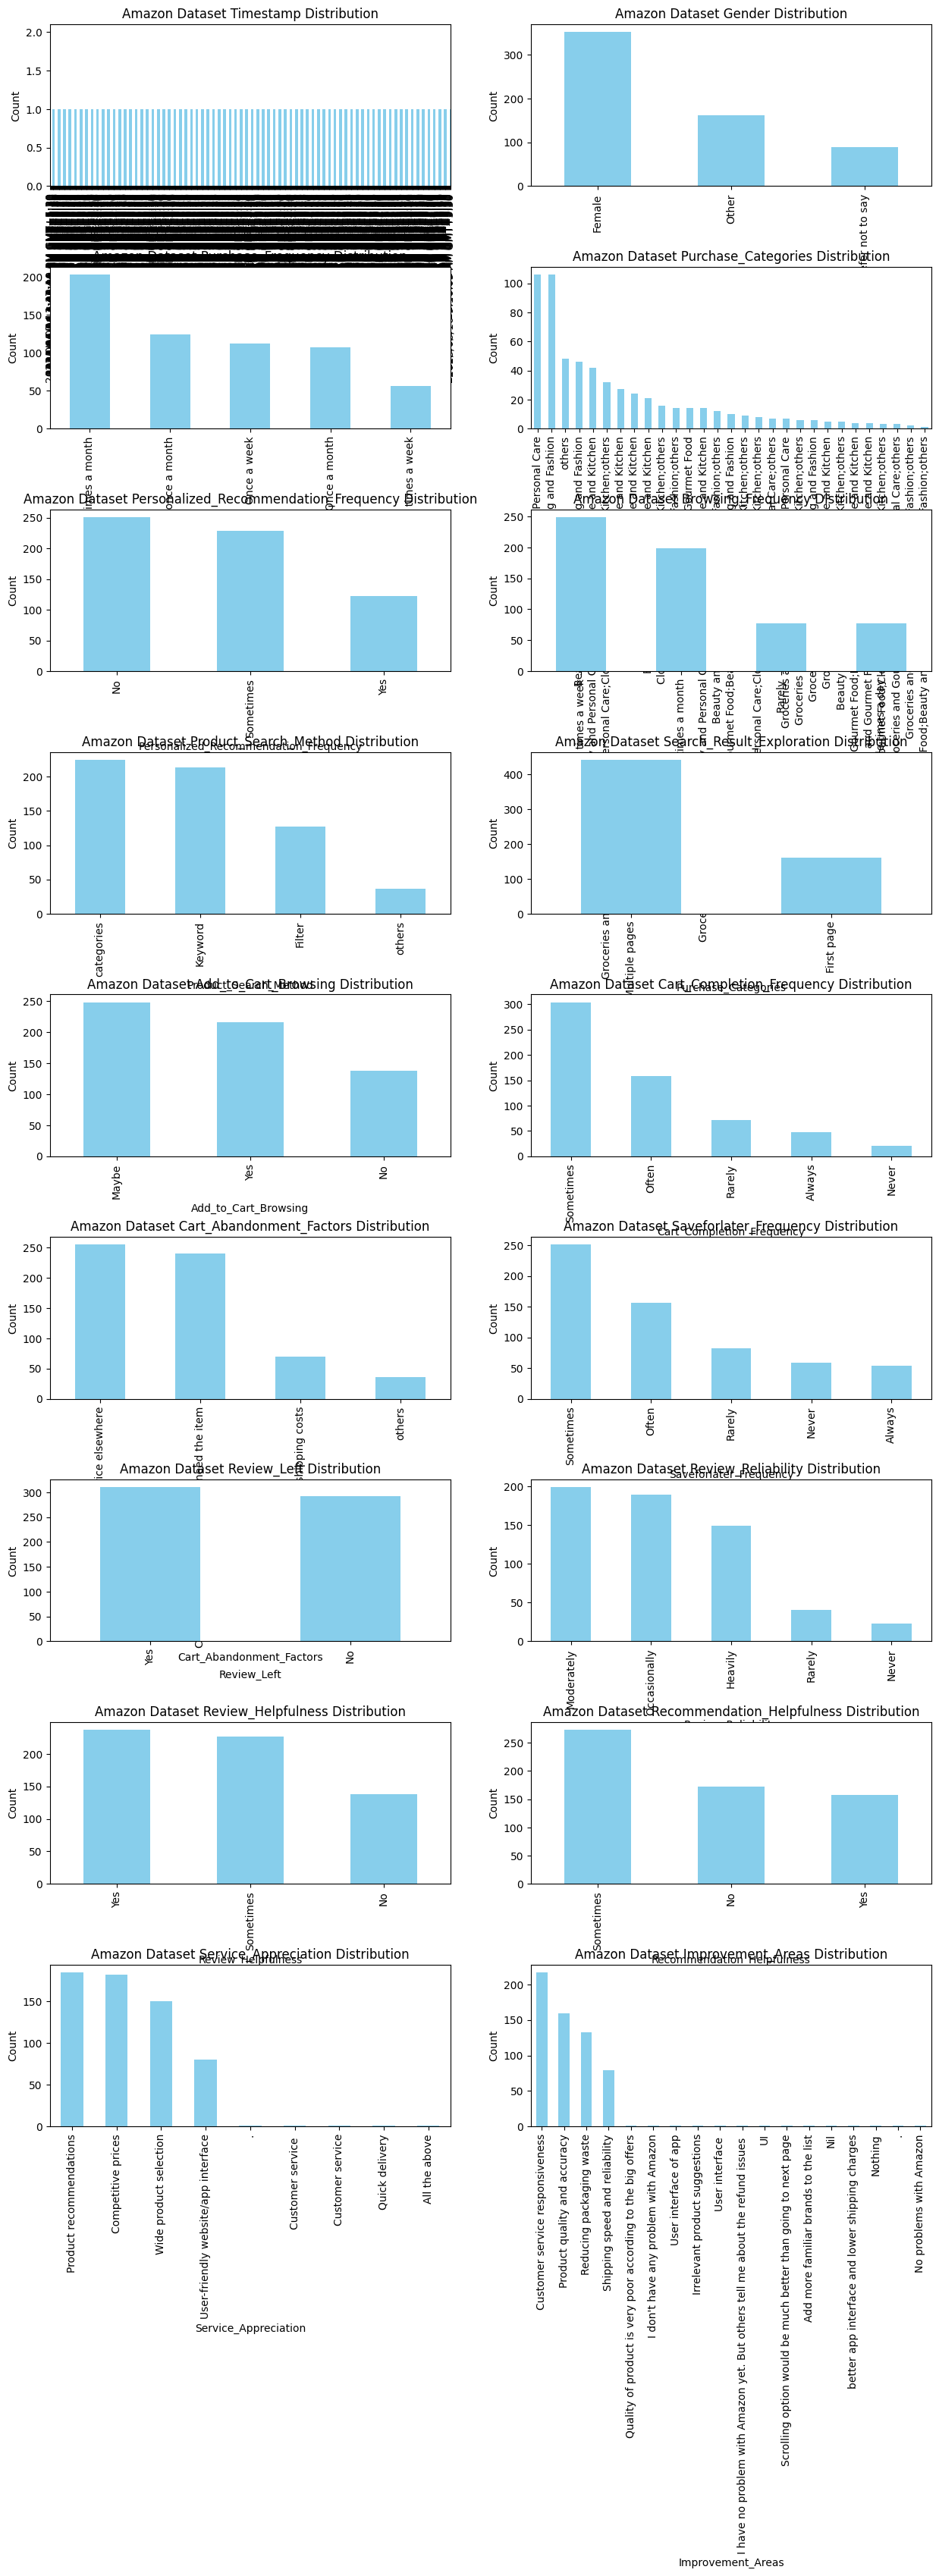

In [60]:
#Bar chart for numerical variables in Amazon dataset.
plot_bar_charts_numerical(df_Amazon, title_prefix='Amazon Dataset ')



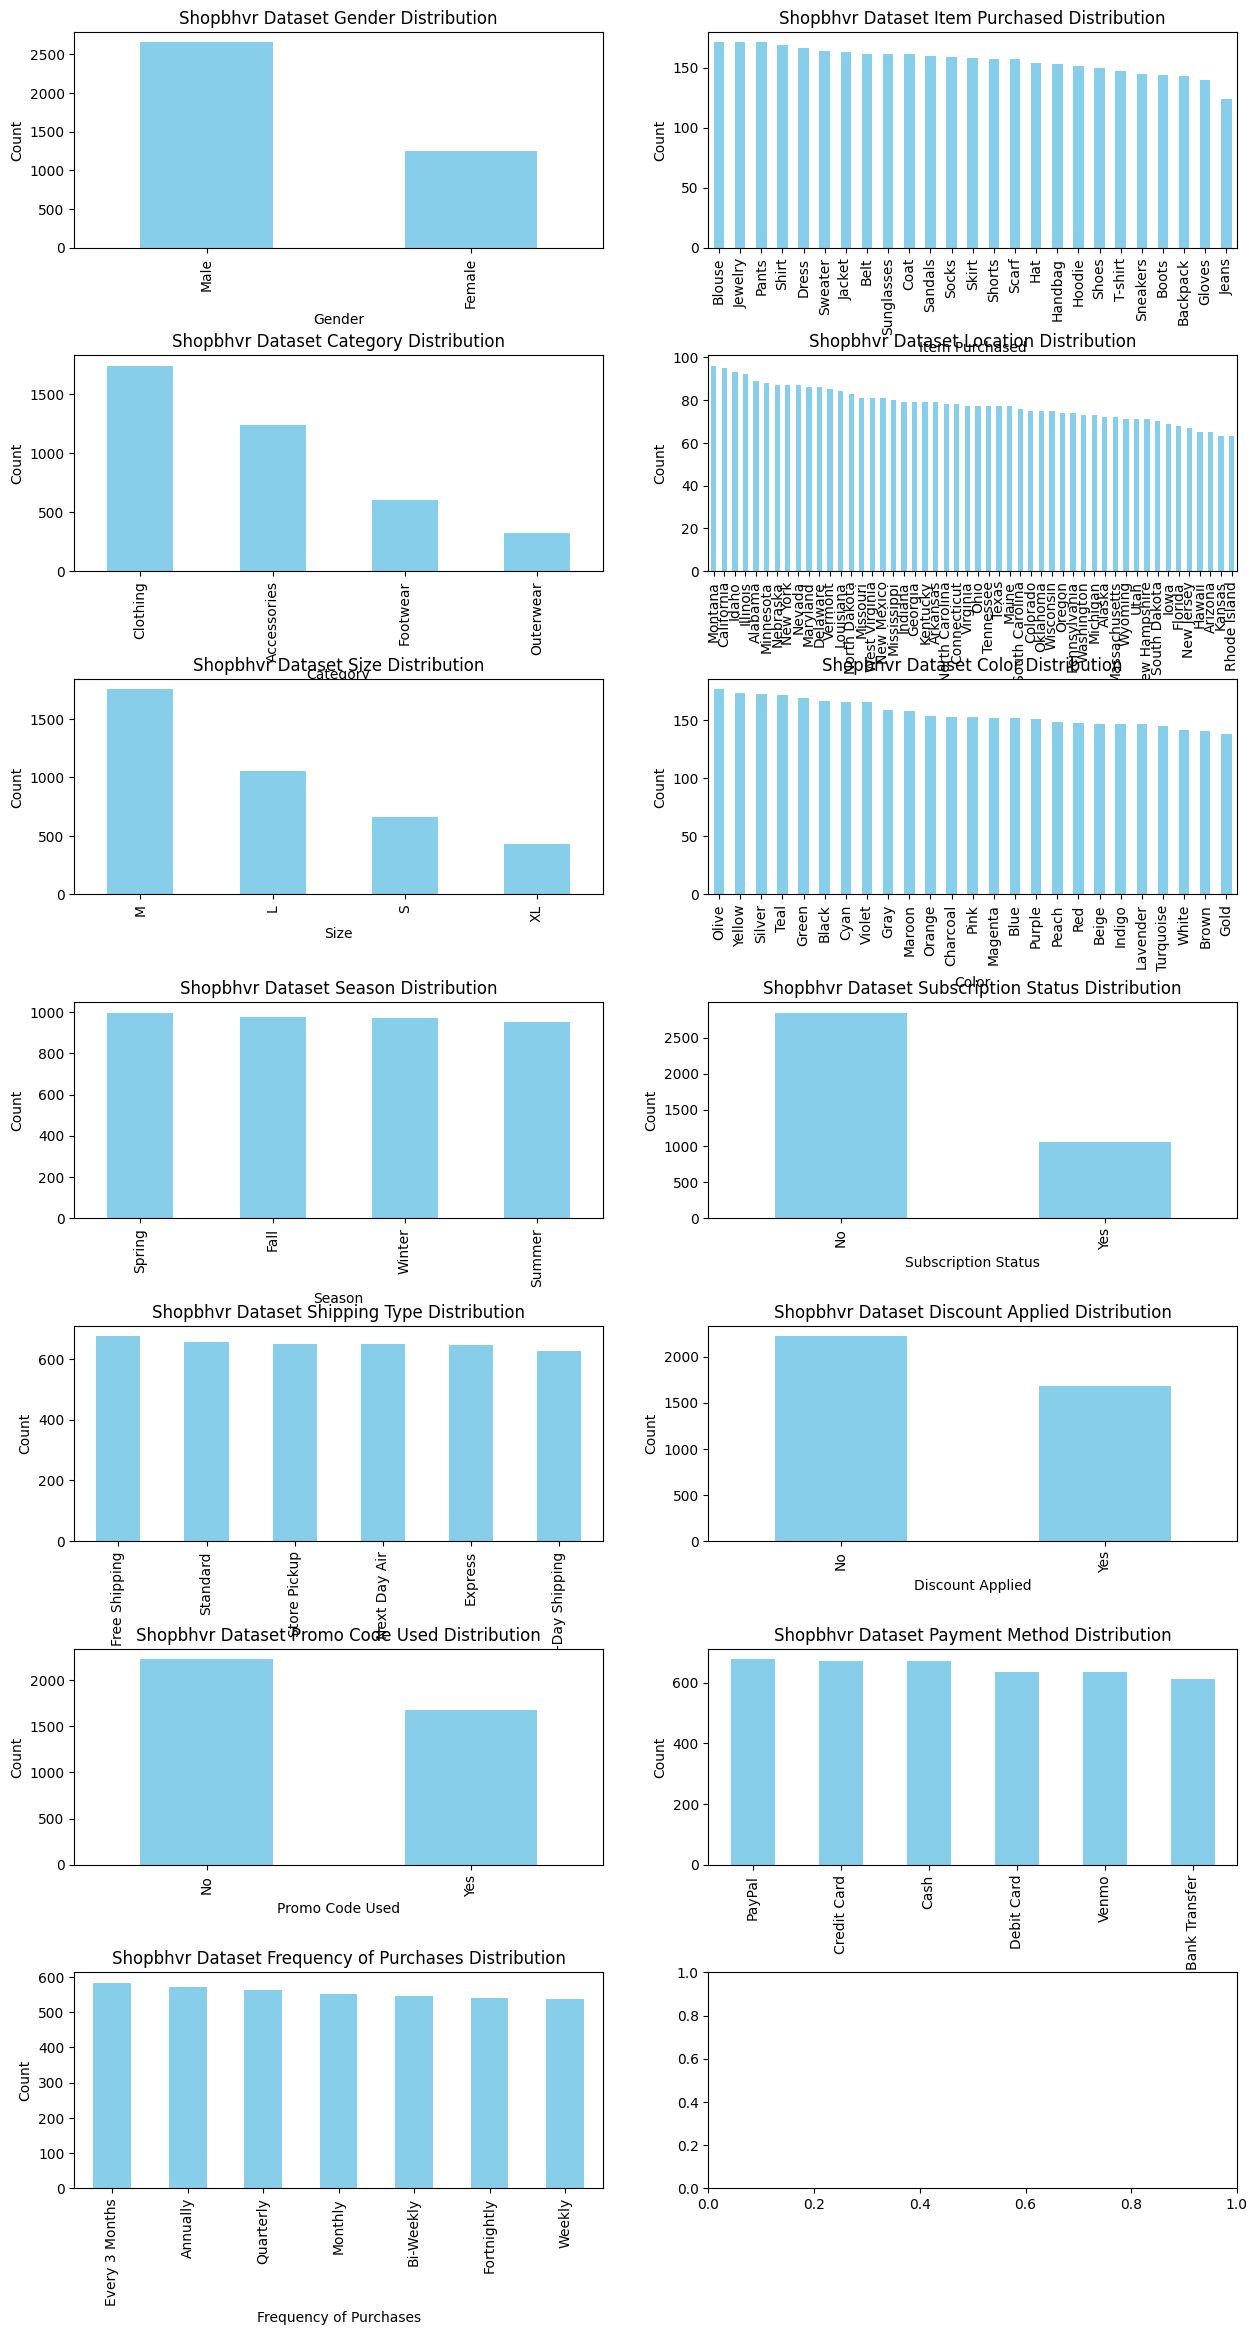

In [61]:
#Bar chart for numerical variables in Amazon dataset.
plot_bar_charts_numerical(df_shopbhvr, title_prefix='Shopbhvr Dataset ')


# **6. FEATURE ENGINEERING.**

Feature engineering is a crucial step in preparing data for machine learning models.The goal is to extract meaningful information and create features that can potentially contribute to the understanding of consumer behavior.

**6.1) Feature Engineering for Amazon Dataset**

**Feature Engineering for df_Amazon:**

**Age Group:**

Create age groups (bins) to better understand different age segments.

**Purchase Frequency Score:**

Convert purchase_frequency to a numerical score (e.g., high, medium, low).

**Review Features:**

Combine review_left, review_reliability, and review_helpfulness into a single review score.

**Shopping Experience:**

Combine shopping_satisfaction, service_appreciation, and improvement_areas into an overall satisfaction score.

**Personalization Features:**

Combine personalized recommendation-related features into a single score.

In [62]:
#Create age groups to better understand different age segments.
import matplotlib.pyplot as plt

# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the bin edges as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']

df_Amazon['Age_group'] = pd.cut(df_Amazon['age'], bins=bins, labels=labels, right=False)
df_Amazon


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Age_group
0,2023/06/04 1:28:19 PM GMT+5:30,23.0,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1.0,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2.0,Yes,1.0,1.0,Competitive prices,Reducing packaging waste,19-25
1,2023/06/04 2:30:44 PM GMT+5:30,23.0,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1.0,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2.0,Sometimes,3.0,2.0,Wide product selection,Reducing packaging waste,19-25
2,2023/06/04 5:04:56 PM GMT+5:30,24.0,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2.0,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4.0,No,3.0,3.0,Competitive prices,Product quality and accuracy,19-25
3,2023/06/04 5:13:00 PM GMT+5:30,24.0,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5.0,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3.0,Sometimes,3.0,4.0,Competitive prices,Product quality and accuracy,19-25
4,2023/06/04 5:28:06 PM GMT+5:30,22.0,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1.0,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4.0,Yes,2.0,2.0,Competitive prices,Product quality and accuracy,19-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23.0,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4.0,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3.0,Sometimes,3.0,4.0,Competitive prices,Customer service responsiveness,19-25
598,2023/06/12 4:02:53 PM GMT+5:30,23.0,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3.0,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,3.0,Sometimes,3.0,3.0,Product recommendations,Reducing packaging waste,19-25
599,2023/06/12 4:03:59 PM GMT+5:30,23.0,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3.0,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,3.0,Sometimes,2.0,3.0,Wide product selection,Product quality and accuracy,19-25
600,2023/06/12 9:57:20 PM GMT+5:30,23.0,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1.0,Yes,Often,others,Sometimes,No,Heavily,Yes,2.0,Yes,2.0,2.0,Wide product selection,Product quality and accuracy,19-25


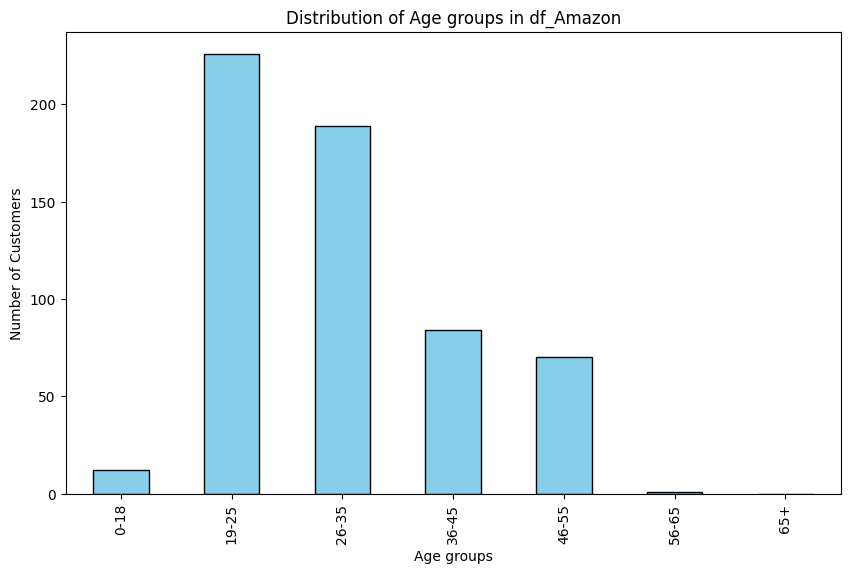

In [63]:
# Plot a bar chart for age groups
age_group_counts = df_Amazon['Age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age groups in df_Amazon')
plt.xlabel('Age groups')
plt.ylabel('Number of Customers')
plt.show()


In [64]:
#One hot encode the Purchase_Frequency column to convert it into numerical values

# Sample DataFrame
data = {'Purchase_Frequency': ['few times a month', 'once a week', 'once a month', 'few times a month', 'once a week']}
df_AmazonPF = pd.DataFrame(data)

# Perform one-hot encoding
df_Amazon_encoded = pd.get_dummies(df_Amazon['Purchase_Frequency'], prefix='Purchase_Frequency')

# Concatenate the encoded columns with the original DataFrame
df_AmazonPF = pd.concat([df_Amazon, df_Amazon_encoded], axis=1)

# Display the result
print(df_AmazonPF)







                          Timestamp   age             Gender  \
0    2023/06/04 1:28:19 PM GMT+5:30  23.0             Female   
1    2023/06/04 2:30:44 PM GMT+5:30  23.0             Female   
2    2023/06/04 5:04:56 PM GMT+5:30  24.0  Prefer not to say   
3    2023/06/04 5:13:00 PM GMT+5:30  24.0             Female   
4    2023/06/04 5:28:06 PM GMT+5:30  22.0             Female   
..                              ...   ...                ...   
597  2023/06/12 4:02:02 PM GMT+5:30  23.0             Female   
598  2023/06/12 4:02:53 PM GMT+5:30  23.0             Female   
599  2023/06/12 4:03:59 PM GMT+5:30  23.0             Female   
600  2023/06/12 9:57:20 PM GMT+5:30  23.0             Female   
601  2023/06/16 9:16:05 AM GMT+5:30  23.0             Female   

         Purchase_Frequency  \
0         Few times a month   
1              Once a month   
2         Few times a month   
3              Once a month   
4    Less than once a month   
..                      ...   
597           

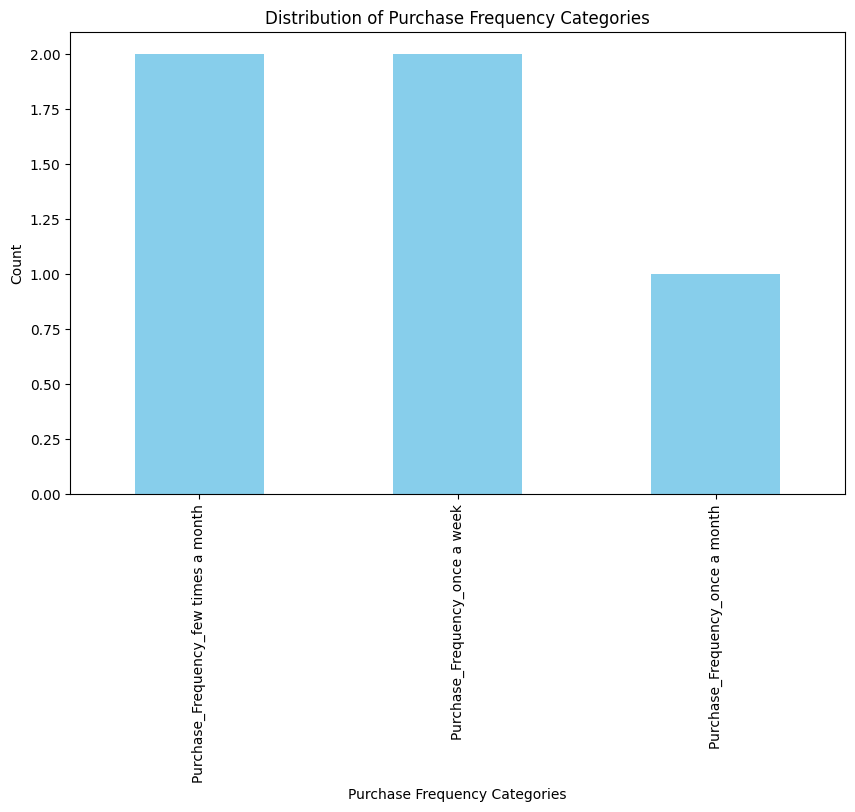

In [65]:
#Visualization of the one-hot encoded Purchase_Frequency column

# Sample DataFrame with one-hot encoded columns
data_encoded = {
    'Purchase_Frequency': ['few times a month', 'once a week', 'once a month', 'few times a month', 'once a week'],
    'Purchase_Frequency_few times a month': [1, 0, 0, 1, 0],
    'Purchase_Frequency_once a week': [0, 1, 0, 0, 1],
    'Purchase_Frequency_once a month': [0, 0, 1, 0, 0],
}

df_Amazon_encoded = pd.DataFrame(data_encoded)

# Plotting the distribution of one-hot encoded columns
plt.figure(figsize=(10, 6))
df_Amazon_encoded.drop('Purchase_Frequency', axis=1).sum().plot(kind='bar', color='skyblue')
plt.title('Distribution of Purchase Frequency Categories')
plt.xlabel('Purchase Frequency Categories')
plt.ylabel('Count')
plt.show()


In [66]:
#Review Features,Combine review_left, review_reliability, and review_helpfulness into a single review score.

# Sample DataFrame with review features
data_review = {
    'Review_Left': ['low', 'medium', 'high', 'low', 'medium'],
    'Review_Reliability': ['low', 'medium', 'high', 'low', 'medium'],
    'Review_Helpfulness': ['low', 'medium', 'high', 'low', 'medium'],
    'Other_Feature1': [10, 20, 30, 40, 50],  # Other features you might have
    'Other_Feature2': [100, 200, 300, 400, 500],  # Other features you might have
}

df_Amazon_review = pd.DataFrame(data_review)

# Map categorical values to numerical values
review_mapping = {'low': 1, 'medium': 2, 'high': 3}
df_Amazon_review['Review_Left'] = df_Amazon_review['Review_Left'].map(review_mapping)
df_Amazon_review['Review_Reliability'] = df_Amazon_review['Review_Reliability'].map(review_mapping)
df_Amazon_review['Review_Helpfulness'] = df_Amazon_review['Review_Helpfulness'].map(review_mapping)

# Create a new column 'Review_Score' as the sum of the three review features
df_Amazon_review['Review_Score'] = df_Amazon_review['Review_Left'] + df_Amazon_review['Review_Reliability'] + df_Amazon_review['Review_Helpfulness']

# Drop the original categorical columns if needed
df_Amazon_review.drop(['Review_Left', 'Review_Reliability', 'Review_Helpfulness'], axis=1, inplace=True)

# Display the result
print(df_Amazon_review)




   Other_Feature1  Other_Feature2  Review_Score
0              10             100             3
1              20             200             6
2              30             300             9
3              40             400             3
4              50             500             6


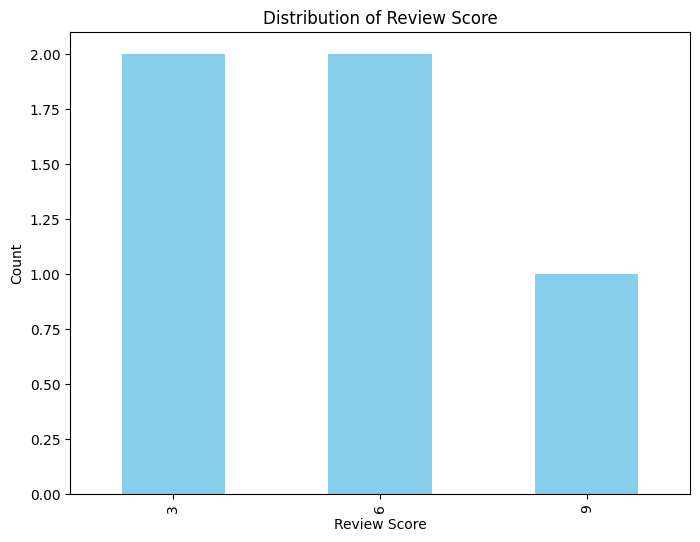

In [67]:
#Visualization for the Review_Score column

# Plot the distribution of 'Review_Score'
plt.figure(figsize=(8, 6))
df_Amazon_review['Review_Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Score')
plt.show()


In [68]:
print(df_Amazon.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Age_group'],
      dtype='object')


In [69]:
#Combine shopping_satisfaction, service_appreciation, and improvement_areas into an overall satisfaction score.
# Mapping categorical values to numerical scores
category_scores = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
}

# Replace categorical values with numerical scores
df_Amazon['Service_Appreciation'] = df_Amazon['Service_Appreciation'].map(category_scores)
df_Amazon['Improvement_Areas'] = df_Amazon['Improvement_Areas'].map(category_scores)

# Combine shopping_satisfaction, service_appreciation, and improvement_areas into an overall satisfaction score.
# Define weights for each column
weights = {'Shopping_Satisfaction': 0.4, 'Service_Appreciation': 0.4, 'Improvement_Areas': 0.2}

# Create a new column 'Overall_Satisfaction' with the weighted sum
df_Amazon['Overall_Satisfaction'] = (
    df_Amazon['Shopping_Satisfaction'] * weights['Shopping_Satisfaction'] +
    df_Amazon['Service_Appreciation'] * weights['Service_Appreciation'] +
    df_Amazon['Improvement_Areas'] * weights['Improvement_Areas']
)

# Display the result
print(df_Amazon[['Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas', 'Overall_Satisfaction']])



     Shopping_Satisfaction  Service_Appreciation  Improvement_Areas  \
0                      1.0                   NaN                NaN   
1                      2.0                   NaN                NaN   
2                      3.0                   NaN                NaN   
3                      4.0                   NaN                NaN   
4                      2.0                   NaN                NaN   
..                     ...                   ...                ...   
597                    4.0                   NaN                NaN   
598                    3.0                   NaN                NaN   
599                    3.0                   NaN                NaN   
600                    2.0                   NaN                NaN   
601                    3.0                   NaN                NaN   

     Overall_Satisfaction  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4      

In [70]:
#Combine personalized recommendation-related features into a single score
data_recommendation = {
    'Personalized_Recommendation': ['no', 'sometimes', 'yes', 'sometimes', 'no'],
    'Other_Feature1': [10, 20, 30, 40, 50],  # Other features you might have
    'Other_Feature2': [100, 200, 300, 400, 500],  # Other features you might have
}

df_Amazon_recommendation = pd.DataFrame(data_recommendation)

# Map categorical values to numerical values
recommendation_mapping = {'no': 0, 'sometimes': 1, 'yes': 2}
df_Amazon_recommendation['Personalized_Recommendation_Score'] = df_Amazon_recommendation['Personalized_Recommendation'].map(recommendation_mapping)

# Drop the original categorical column if needed
df_Amazon_recommendation.drop('Personalized_Recommendation', axis=1, inplace=True)

# Display the result
print(df_Amazon_recommendation)


   Other_Feature1  Other_Feature2  Personalized_Recommendation_Score
0              10             100                                  0
1              20             200                                  1
2              30             300                                  2
3              40             400                                  1
4              50             500                                  0


**6.2) Feature Engineering for Shopping Behavior Dataset**

**Age Group:**

Create age groups (bins) to better understand different age segments.

**Purchase Frequency Score:**

Convert frequency_of_purchases to a numerical score (e.g., high, medium, low).

**Review Features:**

Combine review_rating with previous_purchases to create a comprehensive review score.

**Discount and Promo:**

Create a binary feature indicating whether a discount or promo code was used.

**Subscription Status:**

Convert subscription_status to a binary feature (subscribed or not subscribed).

In [71]:
#Feature engineer Age column
#Create age groups (bins) to better understand different age segments.

# Define age bins and labels
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['0-18', '19-25', '26-35', '36-50', '51+']

# Create a new column 'Age_Group' based on the defined bins and labels
df_shopbhvr['Age_group'] = pd.cut(df_shopbhvr['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the result
print(df_shopbhvr[['Age', 'Age_group']])


       Age Age_group
0     55.0       51+
1     19.0     19-25
2     50.0       51+
3     21.0     19-25
4     45.0     36-50
...    ...       ...
3895  40.0     36-50
3896  52.0       51+
3897  46.0     36-50
3898  44.0     36-50
3899  52.0       51+

[3900 rows x 2 columns]


In [72]:
print(df_shopbhvr.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_group'],
      dtype='object')


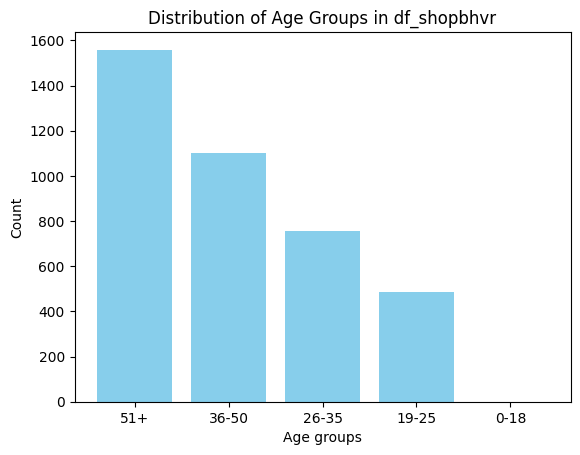

In [73]:
#Visualize the Age Group column created after feature engineering the age column
import matplotlib.pyplot as plt

#'Age_Group' is the column representing age groups in df_shopbhvr
age_group_counts = df_shopbhvr['Age_group'].value_counts()

# Plotting the bar chart
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.title('Distribution of Age Groups in df_shopbhvr')
plt.show()


In [74]:
#Convert frequency_of_purchases to a numerical score (e.g., high, medium, low).
# Define mapping for frequency_of_purchases
frequency_mapping = {'fortnightly': 3, 'weekly': 2, 'monthly': 1}

# Map the values to numerical scores
df_shopbhvr['Purchase_Frequency_Score'] = df_shopbhvr['Frequency of Purchases'].map(frequency_mapping)

# Display the result
print(df_shopbhvr[['Frequency of Purchases', 'Purchase_Frequency_Score']])


     Frequency of Purchases  Purchase_Frequency_Score
0               Fortnightly                       NaN
1               Fortnightly                       NaN
2                    Weekly                       NaN
3                    Weekly                       NaN
4                  Annually                       NaN
...                     ...                       ...
3895                 Weekly                       NaN
3896              Bi-Weekly                       NaN
3897              Quarterly                       NaN
3898                 Weekly                       NaN
3899              Quarterly                       NaN

[3900 rows x 2 columns]


In [75]:
#Combine review_rating with previous_purchases to create a comprehensive review score.
#'Review_ating' and 'Previous_Purchases' are the numerical columns
df_shopbhvr['Comprehensive_Review_Score'] = (df_shopbhvr['Review Rating'] + df_shopbhvr['Previous Purchases']) / 2

# Display the result
print(df_shopbhvr[['Review Rating', 'Previous Purchases', 'Comprehensive_Review_Score']])


      Review Rating  Previous Purchases  Comprehensive_Review_Score
0               3.1                14.0                        8.55
1               3.1                 2.0                        2.55
2               3.1                23.0                       13.05
3               3.5                49.0                       26.25
4               2.7                31.0                       16.85
...             ...                 ...                         ...
3895            4.2                32.0                       18.10
3896            4.5                41.0                       22.75
3897            2.9                24.0                       13.45
3898            3.8                24.0                       13.90
3899            3.1                33.0                       18.05

[3900 rows x 3 columns]


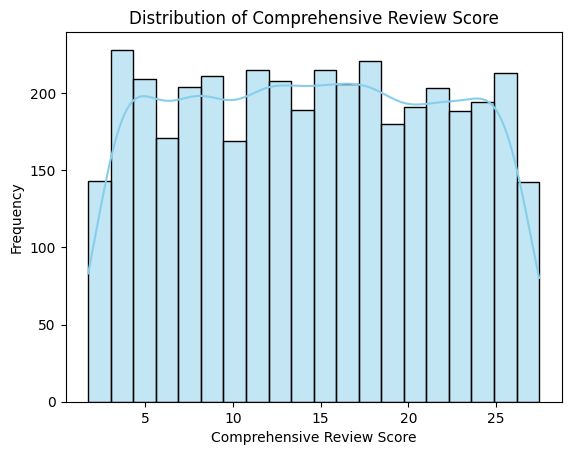

In [76]:
#Visualize the Comprehensive_Review_Score after feature engineering the columns Review Rating and Previous Purchases.

#'Comprehensive_Review_Score' is the new column created
sns.histplot(df_shopbhvr['Comprehensive_Review_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Comprehensive Review Score')
plt.xlabel('Comprehensive Review Score')
plt.ylabel('Frequency')
plt.show()


In [77]:
#Create a binary feature indicating whether a discount or promo code was used.
#'Discount Applied' and 'Promo Code Used' are the columns in the DataFrame
# Create a function to check if either 'Yes' is present
def has_discount_or_promo(row):
    return ('Yes' in row['Discount Applied']) or ('Yes' in row['Promo Code Used'])

# Apply the function to create a new column 'Discount_or_Promo_Used'
df_shopbhvr['Discount_or_Promo_Used'] = df_shopbhvr.apply(has_discount_or_promo, axis=1).astype(int)
print(df_shopbhvr['Discount_or_Promo_Used'])

0       1
1       1
2       1
3       1
4       1
       ..
3895    0
3896    0
3897    0
3898    0
3899    0
Name: Discount_or_Promo_Used, Length: 3900, dtype: int64


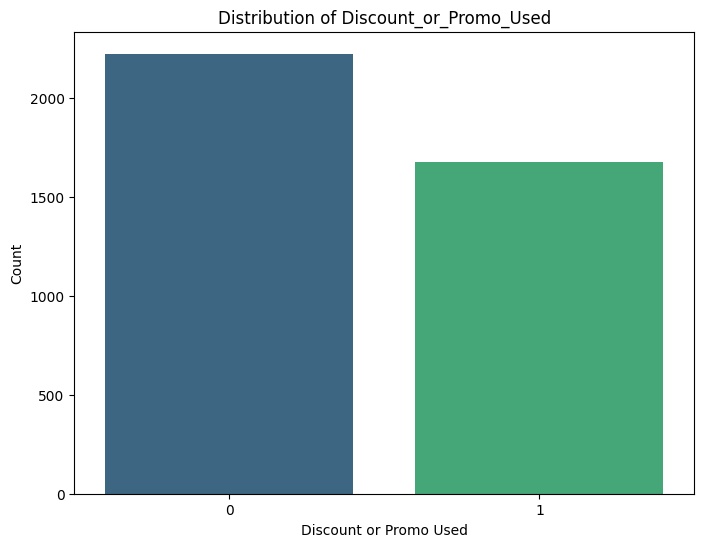

In [78]:
#Visualization of the Discount_or_Promo-Used column
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Discount_or_Promo_Used
plt.figure(figsize=(8, 6))
sns.countplot(x='Discount_or_Promo_Used', data=df_shopbhvr, palette='viridis')
plt.title('Distribution of Discount_or_Promo_Used')
plt.xlabel('Discount or Promo Used')
plt.ylabel('Count')
plt.show()
#This code uses the seaborn library for creating the count plot, which is a nice way to visualize binary features.
#The x-axis represents the binary feature, and the y-axis shows the count of each category (0 or 1).


In [79]:
#Convert subscription_status to a binary feature (subscribed or not subscribed).
# Define a function to convert subscription status to binary
def is_subscribed(status):
    return 1 if status.lower() == 'subscribed' else 0

# Apply the function to create a new column 'Subscribed'
df_shopbhvr['Subscribed'] = df_shopbhvr['Subscription Status'].apply(is_subscribed)

# Display the result
print(df_shopbhvr[['Subscription Status', 'Subscribed']])



     Subscription Status  Subscribed
0                    Yes           0
1                    Yes           0
2                    Yes           0
3                    Yes           0
4                    Yes           0
...                  ...         ...
3895                  No           0
3896                  No           0
3897                  No           0
3898                  No           0
3899                  No           0

[3900 rows x 2 columns]


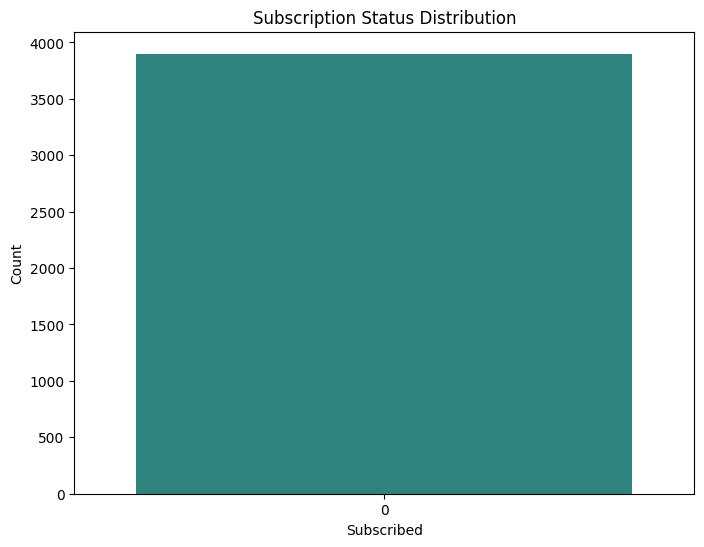

In [80]:
#visualize the Subscription Status after feature engineering
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the Subscribed column
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscribed', data=df_shopbhvr, palette='viridis')
plt.title('Subscription Status Distribution')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


**6.3) Train-Test Split.**

In [81]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_Amazon and df_shopbhvr are your original datasets

# Merge datasets on 'Age group'
merged_df = pd.merge(df_Amazon, df_shopbhvr, on='Age_group', how='inner')

merged_df = merged_df.drop(columns=['Timestamp'])

# Define the target variable
# Assuming 'Purchase frequency score' is your target
# Let's create a binary variable 'Purchase_Made' based on a threshold
threshold_Purchase_Frequency = 50
merged_df['Purchase_Made'] = (merged_df['Purchase_Frequency_Score'] > threshold_Purchase_Frequency).astype(int)


# Choose features X and target variable y
X = merged_df[[
     'age', 'Gender_x', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Product_Search_Method','Purchase_Made',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Age_group', 'Overall_Satisfaction', 'Customer ID',
       'Age', 'Gender_y', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Purchase_Frequency_Score',
       'Comprehensive_Review_Score', 'Discount_or_Promo_Used', 'Subscribed'
]]
y = merged_df['Browsing_Frequency']

# Define random seed for reproducibility
random_seed = 42

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Print the shape of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Check for class imbalance
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


X_train shape: (202024, 46)
X_test shape: (50507, 46)
y_train shape: (202024,)
y_test shape: (50507,)
Class distribution in y_train:
Few times a week        0.419336
Few times a month       0.338158
Multiple times a day    0.122327
Rarely                  0.120179
Name: Browsing_Frequency, dtype: float64

Class distribution in y_test:
Few times a week        0.420833
Few times a month       0.340903
Multiple times a day    0.120676
Rarely                  0.117588
Name: Browsing_Frequency, dtype: float64


In [82]:
# Check for missing values
print("Missing values in X_train:")
print(X_train.isnull().sum())
print("\nMissing values in X_test:")
print(X_test.isnull().sum())


Missing values in X_train:
age                                            0
Gender_x                                       0
Purchase_Frequency                             0
Purchase_Categories                            0
Personalized_Recommendation_Frequency          0
Product_Search_Method                          0
Purchase_Made                                  0
Search_Result_Exploration                      0
Customer_Reviews_Importance                    0
Add_to_Cart_Browsing                           0
Cart_Completion_Frequency                      0
Cart_Abandonment_Factors                       0
Saveforlater_Frequency                         0
Review_Left                                    0
Review_Reliability                             0
Review_Helpfulness                             0
Personalized_Recommendation_Frequency      11525
Recommendation_Helpfulness                     0
Rating_Accuracy                             6961
Shopping_Satisfaction                     

In [83]:
# Drop columns with high missing values
columns_to_drop = ['Service_Appreciation', 'Improvement_Areas', 'Overall_Satisfaction']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)


# **7.2) LOGISTIC REGRESSION**

Logistic Regression:

Purpose: Useful for binary classification tasks, such as predicting whether a customer will make a purchase (1) or not (0).
Interpretability: Provides coefficients that can be interpreted to understand the impact of each feature on the target.

As per our target, this is a  multiclass classification problem hence accuracy alone is not enough to predict the model performance.
Therefore use precision, recall and f1 score.

**Precision**: It indicates how many of the predicted positive instances actually belong to the positive class. A high precision indicates low false positives.

**Recall**: It indicates how many of the actual positive instances were predicted correctly. A high recall indicates low false negatives.

**F1-score**: It is the harmonic mean of precision and recall. It provides a balance between precision and recall.

# **7.3) DECISION TREE**

# **RECOMMENDATIONS**

**Personalized Recommendations:** Implement a robust recommendation engine based on user preferences and historical data to enhance the personalized shopping experience.

**User Interface Optimization:** Improve the user interface based on insights gained from the user journey analysis, making navigation more intuitive and user-friendly.

**Targeted Marketing Campaigns:** Develop targeted marketing campaigns tailored to specific customer segments, optimizing advertising efforts and increasing ROI.

**Dynamic Pricing Strategies:** Explore dynamic pricing models based on customer behavior, demand patterns, and competitor analysis.

**Customer Engagement Initiatives**: Introduce loyalty programs, special promotions, and interactive content to enhance customer engagement and retention.

# **CONCLUSION**

In conclusion, this project provides a comprehensive understanding of customer behavior on e-commerce platforms, offering valuable insights that can drive strategic decision-making. By implementing the recommended strategies, businesses can not only enhance the user experience but also increase customer satisfaction, loyalty, and ultimately, revenue. As the e-commerce landscape continues to evolve, staying attuned to customer behavior is pivotal for maintaining a competitive edge in the market.